# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') 
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

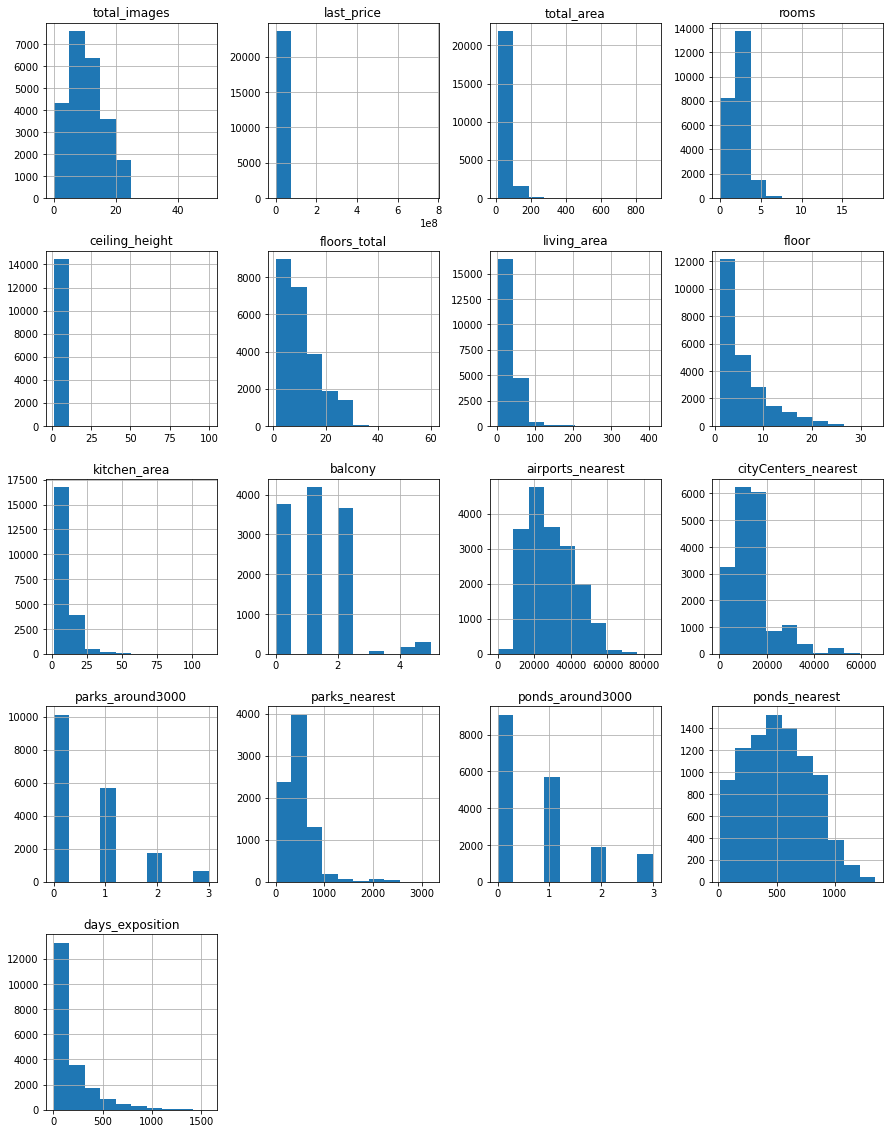

In [4]:
data.hist(figsize=(15, 20))
plt.show()

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [6]:
data.duplicated().sum()

0

In [7]:
#смотрим количество пропущенных значений по стобцам
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Исходя из общей картины данных можно сделать следующие выводы: всего в датафрейме 23699 строк, 22 столбца. В таблице собраны обширные данные, харктеризующие объекты недвижимости от основных характеристик (площадь, этаж, кол-во комнат) до расположения ближайших прудов и  парков. Данных достаточно для проведения всестороннего анализа.
Некоторые столбцы заполнены лишь на половину - высота потолков, наличие балконов, ближайшие аэропорты, парки и пруды. Разбираться с пропусками будем далее.
Дубликатов в таблице не обнаружено.

## Предобработка данных

In [8]:
#еще раз вызываем информацию о датасете, чтобы разобраться с типами данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Типы данных соответствуют содержимому столбцов. Кое-где можно вещественные числа заменить на целые, но из-за большого количества пропусков могут быть проблемы. Поэтому предлагаю оставить как есть.
Единственное, что бы я поменяла это тип даты и времени. Не факт, что придется с ними работать, но на случай, если придется переведу сразу в datetime
Названия столбцов меня тоже устраивают

In [9]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M:%S')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Много пропусков в столбце с балконами. Вероятнее всего, пропуск означает отсутствие балкона. Поменяем пропуски на 0 и переведем тип данных в целочисленный

In [10]:
data['balcony'] = data['balcony'].fillna(0).astype(int)
data['balcony'].unique()

array([0, 2, 1, 5, 4, 3])

In [11]:
#посмотрим перечень значений в столбце is_apartment
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

Пропусков в столбце апартаменты слишком много, можно предположить, что пропуск означает, что помещение - не апартаменты. Заменяем пропуски на False. 

In [12]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].unique()

array([False,  True])

В столбцах с обшим количеством этажей в доме и названием населенного пункта по 86 и 49 пропусков соответственно. При таком количестве строк датафрема (23699) это количество некритично. Мы можем избавиться от строк с пропусками в этих столбцах.

In [13]:
data = data.dropna(subset=['floors_total'])
data = data.dropna(subset=['locality_name'])
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

В столбце с высотой потолков 9084 пропусков, можно пропуски заменить медианным значением, взятому по каждому из этажей здания. Медианным, а не средним потому что в данных могут быть ошибки и неточности, а медианное значение при наличии косяков в данных ближе к истине. Заполнять пропуски медианой будем с помощью цикла.

In [14]:
median_height = data.groupby('floors_total')['ceiling_height'].median()
for i in data['floors_total'].unique():
    data.loc[(data['floors_total'] == i) & (data['ceiling_height'].isna()), 'ceiling_height'] = median_height[i]
    
data['ceiling_height'].isna().sum() #почему-то остался 1 пропуск, удалим эту строку
data = data.dropna(subset=['ceiling_height'])
data['ceiling_height'].isna().sum()

0

В столбцах kitchen_area и living_area можно заменить пропуски на медианное значение этих столбцов по количеству комнат. Аналогично предыдущему используем цикл.

In [15]:
median_kitchen = data.groupby('rooms')['kitchen_area'].median()
for i in data['rooms'].unique():
    data.loc[(data['rooms'] == i) & (data['kitchen_area'].isna()), 'kitchen_area'] = median_kitchen[i]
#data['kitchen_area'].isna().sum() #остаются 194 строки, исключим их, т.к. это скорее всего ошибки
#data = data.dropna(subset=['kitchen_area'])

median_living_area = data.groupby('rooms')['living_area'].median()
for i in data['rooms'].unique():
    data.loc[(data['rooms'] == i) & (data['living_area'].isna()), 'living_area'] = median_living_area[i]

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23564 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23564 non-null  int64         
 1   last_price            23564 non-null  float64       
 2   total_area            23564 non-null  float64       
 3   first_day_exposition  23564 non-null  datetime64[ns]
 4   rooms                 23564 non-null  int64         
 5   ceiling_height        23564 non-null  float64       
 6   floors_total          23564 non-null  float64       
 7   living_area           23564 non-null  float64       
 8   floor                 23564 non-null  int64         
 9   is_apartment          23564 non-null  bool          
 10  studio                23564 non-null  bool          
 11  open_plan             23564 non-null  bool          
 12  kitchen_area          23370 non-null  float64       
 13  balcony         

Итак, что мы обработали к этому моменту:
- изменили тип данных в стобце 'first_day_exposition';
- заменили пропуски в столбце 'balcony' на 0 и привели значения столбца к цельночисловому типу данных;
- заменили пропуски в столбце 'is_apartement' на False;
- удалили строки с пропусками в столбцах 'floors_total' и 'locality_name', так как их общее количнство ничтожно по сравнению с количеством строк датафрейма;
- в столбце 'ceiling_height' заполнили пропуски медианным значением высоты по этажу;
- в столбцах 'living_area' и 'kitchen_area' заполнили пропусками медианным значением соответствующей площади по количеству комнат.

Оставшиеся столбцы с пропусками не видятся мне как ключевые для решения поставленной задачи, поэтому не будет критично оставить их с пропусками. Более того, как их убирать я ума не приложу: удалить не удалишь - слишком много потеряется строк, на какие значения менять мне неведомо(
В совокупности от 23699 строк у нас осталось 23370, потери незначительны, на анализ не повлияет. 
Займемся аномалиями и дубликатами.

In [17]:
data['locality_name'] = data['locality_name'].str.lower().str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции', 'поселок')
data['locality_name'].value_counts()

санкт-петербург                      15650
поселок мурино                         552
поселок шушары                         439
всеволожск                             398
пушкин                                 369
                                     ...  
поселок белоостров                       1
садовое товарищество приладожский        1
поселок рабитицы                         1
деревня вахнова кара                     1
поселок почап                            1
Name: locality_name, Length: 321, dtype: int64

Удалось избавиться от 43 неявных дубликатов. 
Посмотрим аномальные значения в столбце ceiling_height

In [18]:
#data['ceiling_height'].unique()
#строк с аномальными значениями не так много, можно их удалить
data.loc[data['ceiling_height'] > 10,'ceiling_height'] = None
data = data.dropna(subset=['ceiling_height']).reset_index(drop=True)

По результатам предобработки данных мы избавились от пропусков в столбцах там, где это возможно, убрали неявные дубликаты в столбце, обзначающем местоположение объекта недвижимости, а также убрали аномальные значения в столбце с высотой потолков.

## Посчитайте и добавьте в таблицу новые столбцы

Начнем добавлять в датафрейм новые столбцы, необходимые для дальнейшего анализа.
Первым добавим столбец со стоимостью 1 квадратного метра.

In [19]:
data['sq_m_price'] = data['last_price']/data['total_area']
#data.head(10)

Следующим шагом добавим в таблицу столбцы с обозначениями дня недели, месяца и года размещения публикации о продаже

In [20]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
#data.head(10)

Далее добавим в таблицу с типами этажей: первый, последний или другой.

In [21]:
data['floor_type'] = 'другой'
data['floor_type'] = data['floor_type'].where(data['floor'] > 1, 'первый')
data['floor_type'] = data['floor_type'].where(data['floor'] < data['floors_total'], 'последний')
#data.head(20)

Теперь добавим столбец с указанием расстояния до центра города в километрах

In [22]:
data['km_to_centre'] = data['cityCenters_nearest'] / 1000
#data.head()

В ходе добавления новых столбцов в таблице появились следующие столбцы:
- стоимость квадратного метра
- указания на день, месяц и год размещения объявления
- тип этажа: первый, последний или другой
- расстояние до центра города в км

Приступим к исследованию данных с помощью гистограмм и графиков

## Проведите исследовательский анализ данных

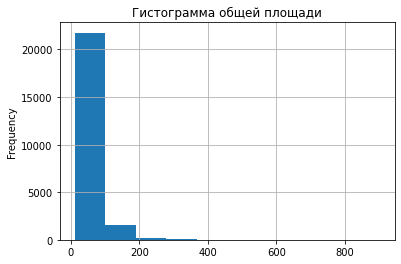

In [23]:
data['total_area'].plot(kind = 'hist', grid = 'True', title = 'Гистограмма общей площади')
plt.show()

In [24]:
data['total_area'].describe()

count    23538.000000
mean        60.328896
std         35.669891
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Из гистограммы видно, что основное количество объявлений касается квартир общей площадью до 100кв.м., средняя площадь 60.3 кв.м., квартиры более 150 кв.м. встречаются очень редко

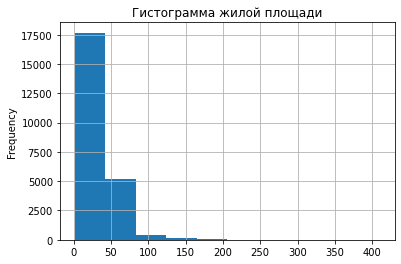

In [25]:
data['living_area'].plot(kind = 'hist', grid = 'True', title = 'Гистограмма жилой площади')
plt.show()

In [26]:
data['living_area'].describe()

count    23538.000000
mean        34.326678
std         21.729113
min          2.000000
25%         18.400000
50%         30.300000
75%         42.700000
max        409.700000
Name: living_area, dtype: float64

Из гистограммы видно, что основная масса квартир имеют жилую площадь до 50 кв.м., пик около 25 кв.м., квартиры жилой площадью свыше 100 кв.м. практически не встречаются. Средняя жилая площадь 34.3 кв.м.

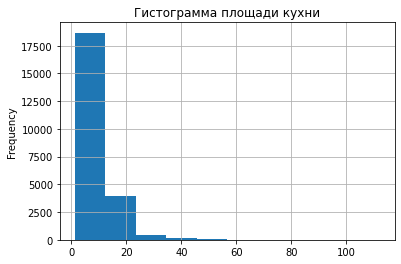

In [27]:
data['kitchen_area'].plot(kind = 'hist', grid = 'True', title = 'Гистограмма площади кухни')
plt.show()

In [28]:
data['kitchen_area'].describe()

count    23345.000000
mean        10.454864
std          5.667750
min          1.300000
25%          7.300000
50%          9.000000
75%         11.500000
max        112.000000
Name: kitchen_area, dtype: float64

Судя по гистограмме, большинство квартир имеют площадь кухни около 8 кв.м., кухни более 10 кв.м. встречаются уже существенно реже, более 20 кв.м. их практически нет. Среднее значение в 10 кв.м. на мой взгляд не показательное, так как на гистограмме видны выбросы, которые могли исказить средний показатель. В этом случае я бы доверяла медиане в 9 кв.м.

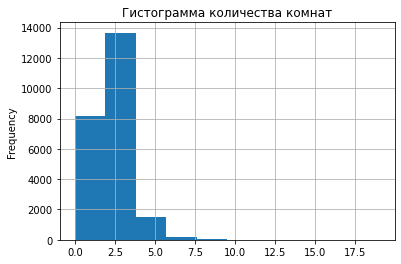

In [29]:
data['rooms'].plot(kind = 'hist', grid = 'True', title = 'Гистограмма количества комнат')
plt.show()

In [30]:
data['rooms'].describe()

count    23538.000000
mean         2.070822
std          1.078807
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Из гистограммы видно, что наиболее популярны квартиры с 1 и 2 комнатами, однушки чуть более популярны. 3х комнатных квартир уже несколько меньше, а 4, 5 и тд почти не встречается

count    23538.000000
mean         2.708418
std          0.245794
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max          8.300000
Name: ceiling_height, dtype: float64

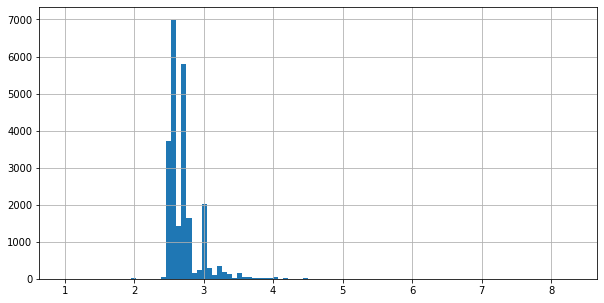

In [31]:
#гистограмма высоты потолков
data['ceiling_height'].hist(bins=100, figsize=(10,5))
data['ceiling_height'].describe()

Исходя из гистограммы, большинство квартир имеет высоту потолков 2,5-2,7 метра. Средняя высота 2,7м. Также есть некая доля квартир с потолками 3 метра, но их примерно раза в 3 меньше.

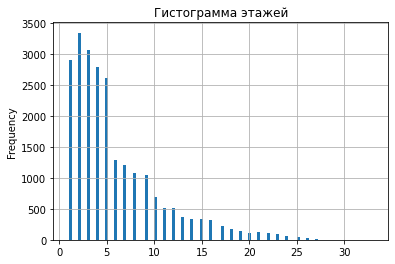

In [32]:
data['floor'].plot(kind = 'hist', bins = 100, grid = 'True', title = 'Гистограмма этажей')
plt.show()

In [33]:
data['floor'].describe()

count    23538.000000
mean         5.876115
std          4.866073
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Основная часть квартир расположена до 5 этажа включительно. Вероятно дело в том, что в основном продают квартиры в пятиэтажках. Большинство квартир расположено на 2 этаже. Средний этаж - 5, максимальный - 33 

In [35]:
data['floor'].unique()

array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 24, 23, 30, 29, 33, 31])

count    23538.000000
mean         5.876115
std          4.866073
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

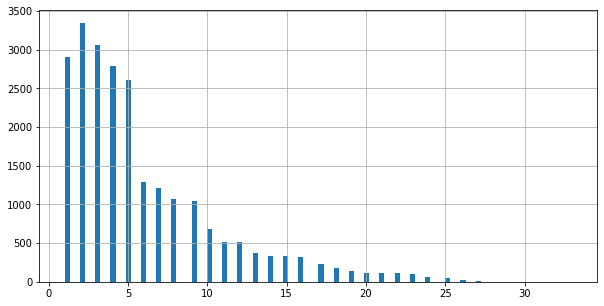

In [36]:
data['floor'].hist(bins=100, figsize=(10,5))
data['floor'].describe()

Основная часть продающихся квартир расположена не на первом и не на последнем этажах. При этом, доля квартир, расположенных на последних этажах больше, чем расположенных на первых

count    23538.000000
mean        10.674951
std          6.589397
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

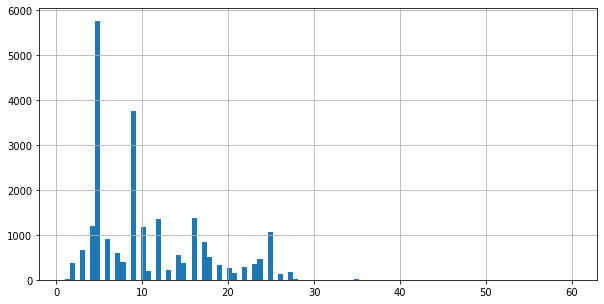

In [37]:
data['floors_total'].hist(bins=100, figsize=(10,5))
data['floors_total'].describe()

Видно, что действительно больше всего домов с 5 этажами, также достаточно много девятиэтажек. Меньше 5 этаже домов почти не встречается. Также выделяются 10, 12, 16, 25 - этажные дома. Выше 27 этажей домов практически нет.

count    18046.000000
mean     14192.421645
std       8611.759393
min        181.000000
25%       9238.000000
50%      13096.500000
75%      16285.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

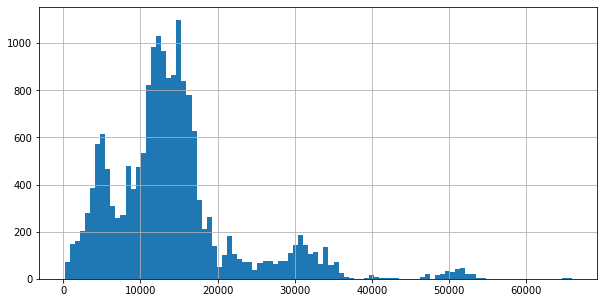

In [38]:
data['cityCenters_nearest'].hist(bins=100, figsize=(10,5))
data['cityCenters_nearest'].describe()

Большинство продающихся квартир расположены от 11 до 17 км от центра. Средняя удаленность - 14 км. Также есть пик в 5 км от центра, а также неболбшой объем квартир, расположенных в 50-55 км от центра. Возможно, там крупный населенный пункт. Удаленность свыше 55 км от центра почти не встречается. В диапозоне от 37 до 47 км также очень мало предложений.

count    18023.000000
mean     28798.902957
std      12631.157661
min          0.000000
25%      18561.000000
50%      26757.000000
75%      37274.000000
max      84869.000000
Name: airports_nearest, dtype: float64

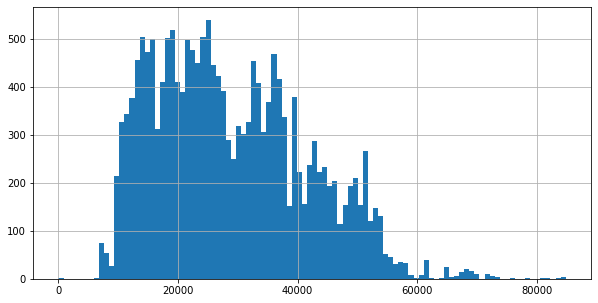

In [39]:
data['airports_nearest'].hist(bins=100, figsize=(10,5))
data['airports_nearest'].describe()

Основная часть квартир расположена на расстоянии от 10 до 25 км от аэропорта. Максимальная удаленность - 84 км, средняя удаленность 28 км.

count    8022.000000
mean      490.577661
std       341.673892
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

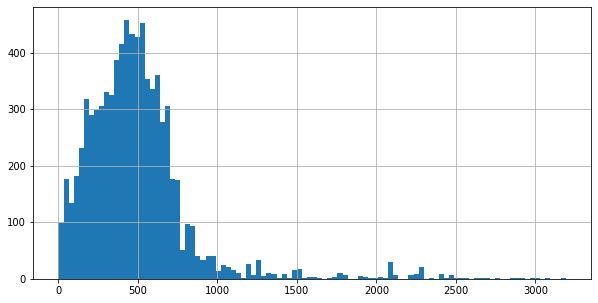

In [40]:
data['parks_nearest'].hist(bins=100, figsize=(10,5))
data['parks_nearest'].describe()

Судя по гистограмме подавляющее большинство квартир находятся рядом с парками. Основная масса квартир расположена на расстоянии от 200 до 750 метров до парка. Расстояние от 1км и болье встречается крайне редко.

count    23538.000000
mean         2.567550
std          1.788459
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64

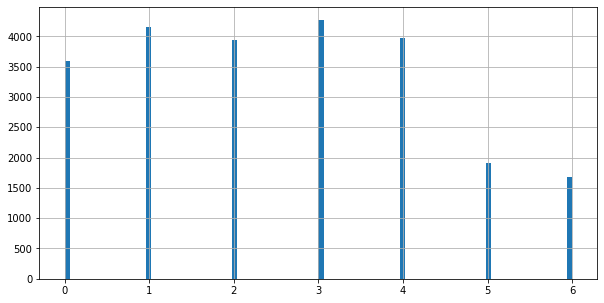

In [41]:
data['weekday'].hist(bins=100, figsize=(10,5))
data['weekday'].describe()

По гистограмме видно, что в течение рабочей недели количество обхявлений примерно одинаково, однако небольшлое большинство имеет четверг. По выходным объявления выкладывали в 2 раза реже.

count    23538.000000
mean         6.402286
std          3.492913
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

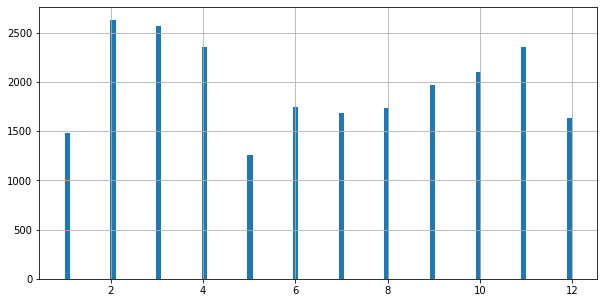

In [42]:
data['month'].hist(bins=100, figsize=(10,5))
data['month'].describe()

Судя по гистограмме, наибольшее количество объявлений появляются в феврале, марте, апреле, сентябре, октябре и ноябре. Провалы в январе и мае, тут все понятно - праздники. Летом тоже наблюдается спад количества объявлений. В декабре объявлений тоже меньше  - мало кто озадачивается продаже недвижимости под Новый год.

count    20373.000000
mean       180.790703
std        219.789448
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

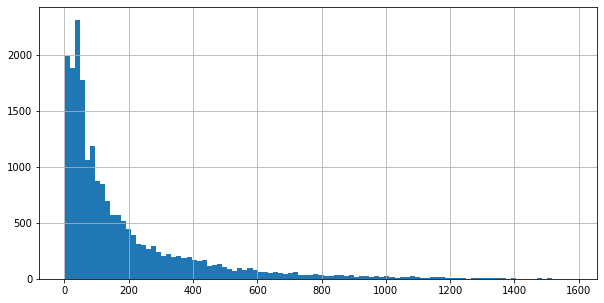

In [43]:
#проанализируем то, насколько долго продаются квартиры
data['days_exposition'].hist(bins=100, figsize=(10,5))
data['days_exposition'].describe()

Судя по гистограмме квартиры в основном продаются достаточно быстро. Большинство квартир продается примерно за 3 месяца. Продажу до истечения 3 месяцев можно считать быстрой. От 6 месяцев до года продается десятая часть квартир, свыше года еще меньше. Продажу свяше 600 дней можно считать редкой и аномально долгой. Среднее количество дней, в течение которых висело объявление - 180 (6 месяцев). Медианное значение - 95 дней (около 3 месяцев)

Кроме того, видны выбивающиеся значения, некоторые объявления провисели аномально долго, максимальное значение - 1580 дней (это где то 4 года и 4 месяца). Причин такому необыкновенно длительному размещению может быть несколько: ошибки в данных, например, случайно 0 лишний напечатался и нормальные 158 дней превратились в аномальные 1580. Может быть реальное объявление провисело такое количество времени, но это по мне маловероятно, так как человека замучали бы звонками. Возможно также, что такие аномально долгие объявления - проделки каких-нибудь мошенников или не самых добросовестных риэлторов, которые выставляют несуществующие объекты с супер привлекательными условиями, чтобы заманить потенциального клиента или жертву мошенничества.

### Изучим влияние различных факторов на стоимость недвижимости

Мы будем изучать зависимость стоимость объекта недвижимости от следующих факторов:
  - общей площади;
  - жилой площади;
  - площади кухни;
  - количество комнат;
  - типа этажа, на котором расположена квартира (первый, последний, другой);
  - даты размещения (день недели, месяц, год)

<AxesSubplot:xlabel='total_area'>

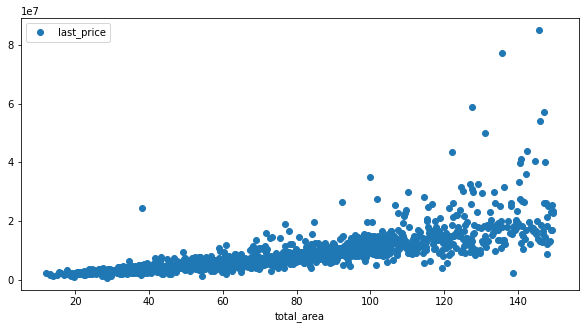

In [44]:
area_price = data.query('total_area < 150').pivot_table(index='total_area', values='last_price', aggfunc='median')
#print(area_price)
area_price.plot(style='o', figsize=(10,5))

Видно, что действительно, с ростом общей площади растет и общая стоимость. Проверим тоже самое для стоимости 1 кв метра

<AxesSubplot:xlabel='total_area'>

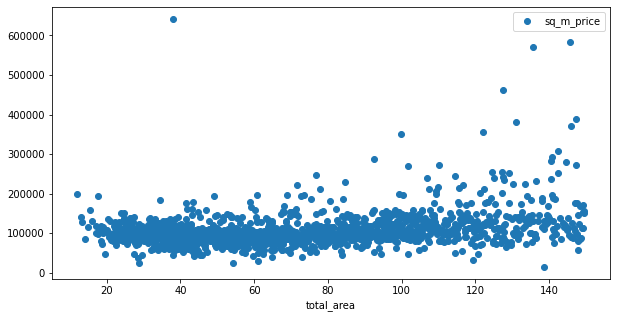

In [45]:
area_price = data.query('total_area < 150').pivot_table(index='total_area', values='sq_m_price', aggfunc='median')
#print(area_price)
area_price.plot(style='o', figsize=(10,5))

По графику видно, что стоимость квадратного метра не зависит от общей площади.
Далее рассмотрим влияние жилой площади на стоимость

<AxesSubplot:xlabel='living_area'>

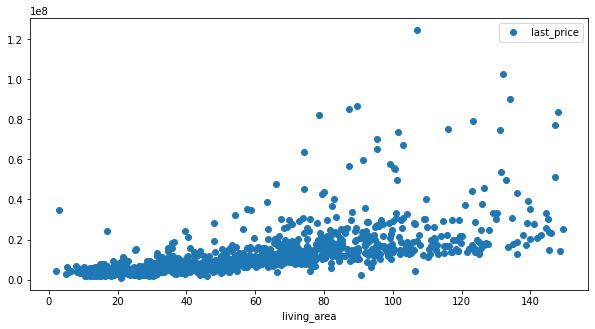

In [46]:
living_area_price = data.query('living_area < 150').pivot_table(index='living_area', values='last_price', aggfunc='median')
#print(living_area_price)
living_area_price.plot(style='o', figsize=(10,5))

Здесь также наблюдается зависимость стоимости объекта от размера жилой площади. Проверим влияет ли это на стоимость 1 кв метра

<AxesSubplot:xlabel='living_area'>

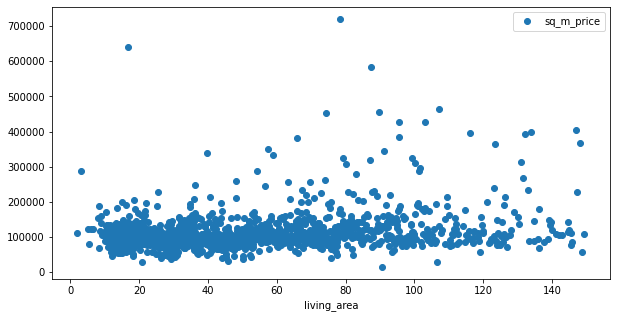

In [47]:
living_area_price = data.query('living_area < 150').pivot_table(index='living_area', values='sq_m_price', aggfunc='median')
#print(living_area_price)
living_area_price.plot(style='o', figsize=(10,5))

Также как и в предыдущем случае, влияния общей стоимости на 1 кв метр не наблюдается. Посмотри теперь, как влияет площадь кухни

<AxesSubplot:xlabel='kitchen_area'>

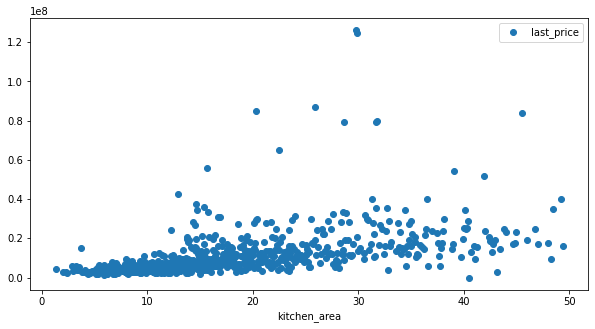

In [48]:
kitchen_area_price = data.query('kitchen_area < 50').pivot_table(index='kitchen_area', values='last_price', aggfunc='median')
#print(kitchen_area_price)
kitchen_area_price.plot(style='o', figsize=(10,5))

Влияние площади кухни на стоимость не такое заметное, как предыдущие факторы, но тем ни менее небольая зависимость есть. Проверим влияние на стоимость 1 кв. метра

<AxesSubplot:xlabel='kitchen_area'>

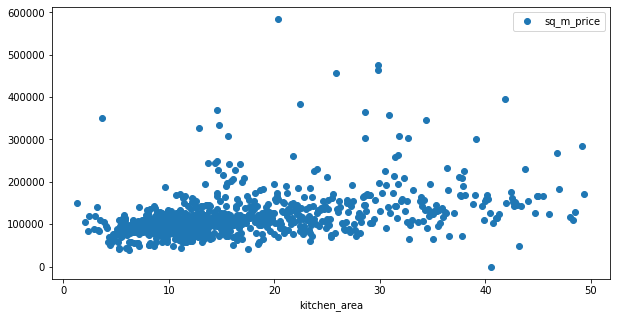

In [49]:
kitchen_area_price = data.query('kitchen_area < 50').pivot_table(index='kitchen_area', values='sq_m_price', aggfunc='median')
#print(kitchen_area_price)
kitchen_area_price.plot(style='o', figsize=(10,5))

Влияние площади кухни на стоимость 1 кв метра незаметно.
Переходим к количеству комнат

<AxesSubplot:xlabel='rooms'>

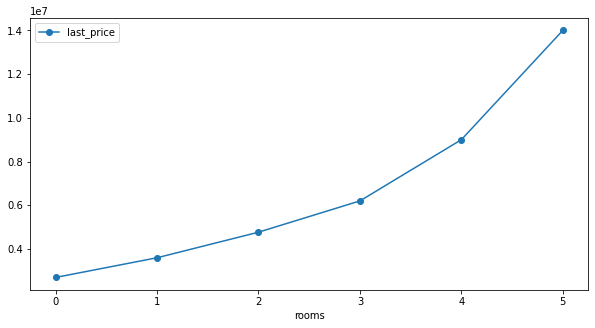

In [50]:
room_am_price = data.query('rooms < 6').pivot_table(index='rooms', values='last_price', aggfunc='median')
#print(room_am_price)
room_am_price.plot(style='o-', figsize=(10,5))

Очевидно, как с ростом количенства комнат растет стоимость объекта недвижимости. Посмотрим что со стоимостью квадратного метра

<AxesSubplot:xlabel='rooms'>

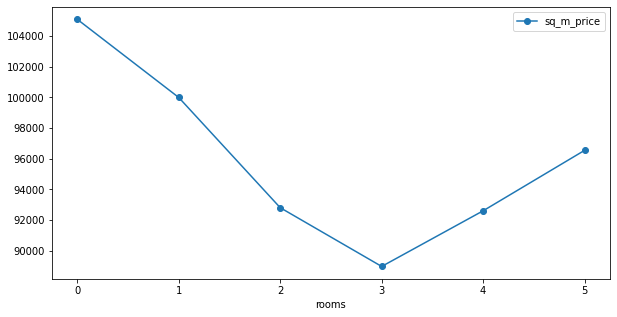

In [51]:
room_am_price = data.query('rooms < 6').pivot_table(index='rooms', values='sq_m_price', aggfunc='median')
#print(room_am_price)
room_am_price.plot(style='o-', figsize=(10,5))

Цена за квадратный метр уменьшается при увеличении количнества комнат до 3. Если в квартире свыше 3 комнат, стоимость квадратного метра растет. 
Рассмотрим влияние типа этажа на стоимость

<AxesSubplot:xlabel='floor_type'>

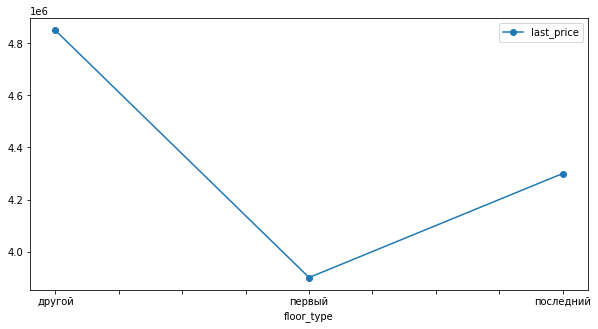

In [52]:
floor_type_price = data.pivot_table(index='floor_type', values='last_price', aggfunc='median')
#print(floor_type_price)
floor_type_price.plot(style='o-', figsize=(10,5))

На первых этажах квартиры самые дешевые. Посмотрим, как этаж влияет на стоимость 1 квадратного метра

<AxesSubplot:xlabel='floor_type'>

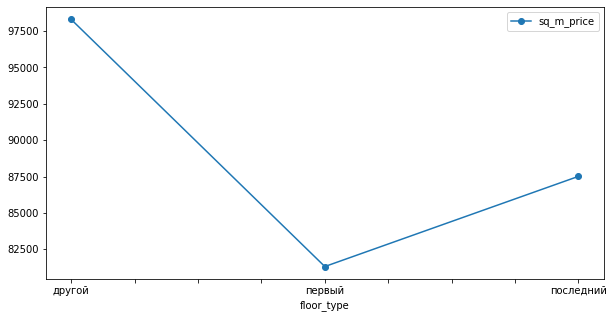

In [53]:
floor_type_price = data.pivot_table(index='floor_type', values='sq_m_price', aggfunc='median')
#print(floor_type_price)
floor_type_price.plot(style='o-', figsize=(10,5))

Аналогично, стоимость 1 квадратного метра ведет себя в зависимости от этаже также, как и общая стоимость.
Теперь изучим зависимость стоимости от дня недели, месяца и года, когда было размещено объявление

<AxesSubplot:xlabel='weekday'>

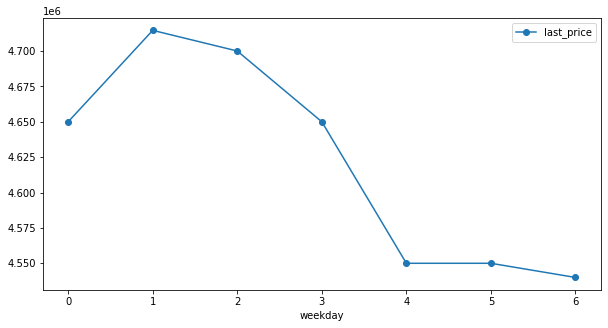

In [54]:
weekday_price = data.pivot_table(index='weekday', values='last_price', aggfunc='median')
#print(weekday_price)
weekday_price.plot(style='o-', figsize=(10,5))

Самые дорогие квартиры выставляли по вторникам, к пятнице стоимость квартир снижалась. В исследовании зависимости стоимости от дня недели/месяца/года не вижу смысла отдельно отслеживать зависимость стоимости квадратного метра, тенденции будут аналогичными.

<AxesSubplot:xlabel='month'>

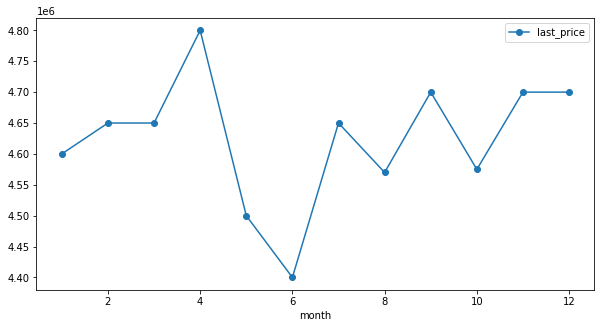

In [55]:
month_price = data.pivot_table(index='month', values='last_price', aggfunc='median')
#print(month_price)
month_price.plot(style='o-', figsize=(10,5))

Самые дорогие квартиры публиковались в апреле, самые дешевые в июне, в сотальные месяцы стоимость хаотично разбросана, более менее стабильна она в зимние месяцы

<AxesSubplot:xlabel='year'>

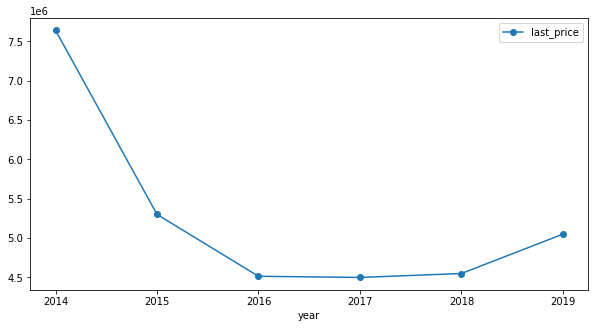

In [56]:
year_price = data.pivot_table(index='year', values='last_price', aggfunc='median')
#print(year_price)
year_price.plot(style='o-', figsize=(10,5))

Стоимость квартир резко упала за период с 2014 по 2016 годы, с 2016 по 2018 стоимость держалась примерно на одном уровне. Начиная с 2018 года наблюдается рост цен.

Больше всего на стоимость квартир. а также 1 квадратного метра влияет общая площадь, количество комнат и этаж. При этом влияние количнества комнат на стоимость 1 квадратного метра нелинейно.

###### Изучаем 10 населенных пунктов с самым большим количеством объявлений

In [57]:
#находим 10 самых популярных населенных пунктов и сохраняем их в новой переменной
top_locality = data['locality_name'].value_counts().head(10)
print(top_locality)

санкт-петербург      15634
поселок мурино         550
поселок шушары         439
всеволожск             398
пушкин                 369
колпино                338
поселок парголово      327
гатчина                306
деревня кудрово        299
выборг                 237
Name: locality_name, dtype: int64


Найдем среднюю стоимость 1 кв метра в выбранных населенных пунктах

<AxesSubplot:xlabel='locality_name'>

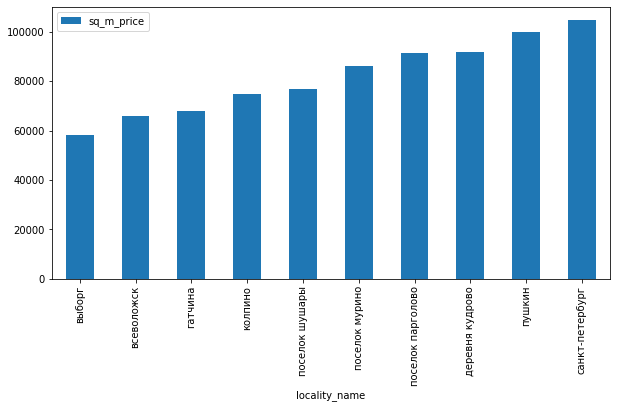

In [58]:
top10_price = data.query('locality_name in @top_locality.index').pivot_table(index='locality_name', values='sq_m_price', \
                                                                             aggfunc='median').sort_values('sq_m_price')
#print(top10_price)
top10_price.plot(kind='bar', figsize=(10,5))

Итак, судя по графику в 10-ке лидеров по количеству объявлений цена за квадратный метр варьируется от 60000 до 100000.
Самым дорогим населенным пунктом, ожидаемо, оказался Санкт-Петербург, не сильно уступает ему Пушкин. Самый дешевый квадратный метр в Выборге.

###### Теперь посчитаем стоимость каждого километра, приближающего нас к центру города

,km_to_centre
count,2343.000000
mean,10.464784
std,4.942267
min,0.181000
25%,6.017000
50%,10.647000
75%,13.829000
max,28.018000


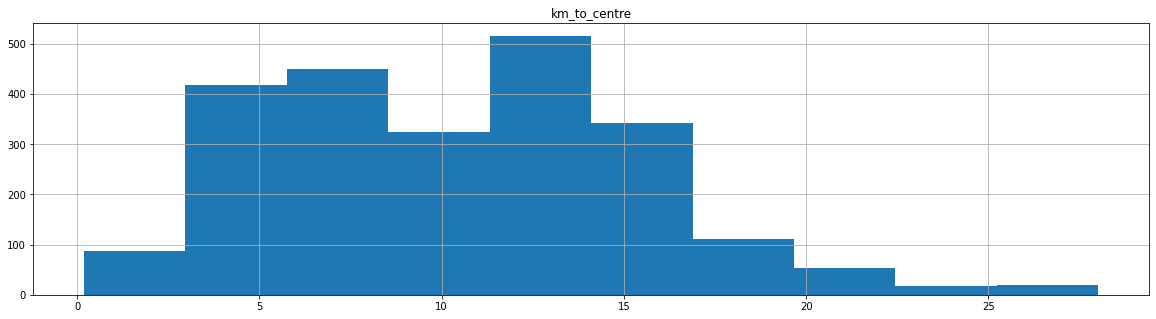

In [59]:
#делаем выборку квартир в Спб
spb = data.query('locality_name == "санкт-петербург"')

spb_km_price = spb.pivot_table(index='last_price', values='km_to_centre', aggfunc='median')
spb_km_price.hist(bins=10, figsize=(20,5))
spb_km_price.describe()


Из графика видно, что цена высокая примерно в 4-5 км от центра города, далее, на расстоянии примерно с 6 и до 14 км от центра цена практически не меняется. После 17 км от центра резкий спад цены и далее значение идет на понижение. 

## Общий вывод

Проведя анализ можем сделать выводы о том, что на стоимость квартир в большей степени влияют следующие факторы:
- удаленность от центра
- площадь квартиры
- количество комнат
- этаж

Кроме того, сделаны следубщие интересные наблюдения:
 - Самые популярные месяцы для продажи жилья это весна (кроме мая) и осень.
 - По выходным выкладывают меньше объявлений, чем по будням
 - Стоимость квадратного метра ниже в 3-х комнатной квартире, чем в квартирах с бОльшим количеством комнат
 - Стоимость жилья в Лен области сильно упала в период с 2014 по 2016 годы
 - Квартиры с бОльшей стоимостью выставляют на продажу в начале недели

В данных действительно много пропусков и много аномальных значений. Как этого избежать в будущем, я если честно представляю себе слабо. Вероятно, нужно улучшить механизм сбора данных. Чтобы, например, при заполнении объявления стали обязательны для заполнения поля, в которых особо много пропусков и которые являются ключевыми для анализа. 
В случае с аномальными значениями, вероятно, также можно обучить форму объявления распознавать заведомо неправдоподобные вводные (например, высота потолка 6 метров). 